In [1]:
# import libraries
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# load image file
image_file = 'Images/mikasa.png'
input_image = imread(image_file)

In [4]:
#check if the image is grayscale or color
if len(input_image.shape) == 3:
    #the image has color, so we need to convert it into grayscale image
    # Extracting each one of the RGB components
    r_img, g_img, b_img = input_image[:, :, 0], input_image[:, :, 1], input_image[:, :, 2]
    ### convert the rgb image into grayscale image
    gamma = 1.4  # a parameter
    r_const, g_const, b_const = 0.2126, 0.7152, 0.0722 # weights for the rgb components respectively
    grayscale_image = r_const*r_img**gamma + g_const*g_img**gamma + b_const*b_img**gamma
else:
    grayscale_image = input_image

C:\Users\84817\Anaconda3\envs\project_android\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


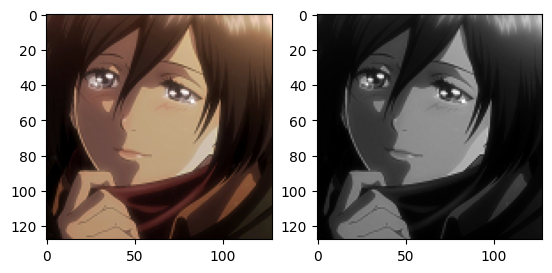

In [5]:
#this command will display the grayscale image alongside the original image
fig1 = plt.figure(1)
ax1, ax2 = fig1.add_subplot(121), fig1.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(grayscale_image, cmap=plt.get_cmap('gray'))
fig1.show()

In [6]:
# Define matrix associate with sobel operator and initialize gradient matrices
#Gx detects vertical edge, Gy detects horizontal edge
Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
[rows, columns] = np.shape(grayscale_image)  # we need to know the shape of the input grayscale image
GradientX = np.zeros(shape=(rows, columns))  # Gradient X matrix
GradientY = np.zeros(shape=(rows, columns))  # Gradient Y matrix
sobel_filtered_image = np.zeros(shape=(rows, columns))  # initialization of the output image array (all elements are 0)

In [7]:
# Now we "sweep" the image in both x and y directions and compute the gradient matrices
for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, grayscale_image[i:i + 3, j:j + 3]))  # x direction
        gy = np.sum(np.multiply(Gy, grayscale_image[i:i + 3, j:j + 3]))  # y direction
        GradientX[i+1, j+1] = np.absolute(gx);
        GradientY[i+1, j+1] = np.absolute(gy);
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)  # calculate the "hypotenuse"

C:\Users\84817\Anaconda3\envs\project_android\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


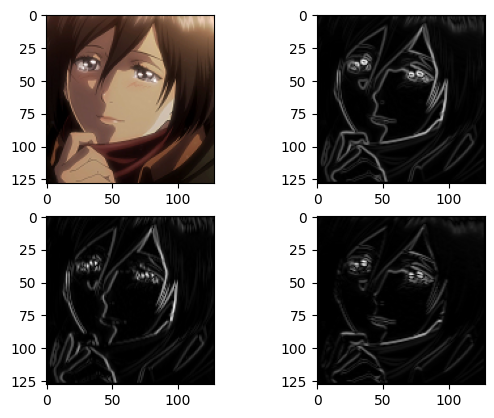

In [8]:
# Display the original image and the Sobel filtered image in vwertical, horizontal, both combined gradient
fig2 = plt.figure(2)
ax1, ax2, ax3, ax4 = fig2.add_subplot(221), fig2.add_subplot(222), fig2.add_subplot(223), fig2.add_subplot(224)
ax1.imshow(input_image)
ax2.imshow(sobel_filtered_image, cmap=plt.get_cmap('gray'))
ax3.imshow(GradientX, cmap=plt.get_cmap('gray'))
ax4.imshow(GradientY, cmap=plt.get_cmap('gray'))
fig2.show()

#Show both images


# Save the filtered image in destination path
# plt.imsave('sobel_filtered_image.png', sobel_filtered_image, cmap=plt.get_cmap('gray'))

In [71]:
### output txt file containing these matrices: input_image; GradientX; GradientY
### someone please help me 

2